<a href="https://colab.research.google.com/github/tithihalder9/TithiHalder23-ML_Lab_Code/blob/main/Q14_vehicle_dataset_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Create Vehicle Dataset
import pandas as pd
import numpy as np

np.random.seed(42)
data = {
    'Vehicle_ID': range(1, 21),
    'Engine_Size': np.random.uniform(1.0, 5.0, 20),     # in liters
    'Horsepower': np.random.randint(70, 400, 20),       # HP
    'Mileage': np.random.randint(10, 35, 20),           # km/l
    'Price': np.random.randint(5, 50, 20) * 1000        # in $
}
df = pd.DataFrame(data)
df.to_csv("vehicle_dataset.csv", index=False)
print("✅ Dataset created: vehicle_dataset.csv")
print(df.head())


✅ Dataset created: vehicle_dataset.csv
   Vehicle_ID  Engine_Size  Horsepower  Mileage  Price
0           1     2.498160         128       27  46000
1           2     4.802857         239       18   8000
2           3     3.927976         257       30  33000
3           4     3.394634         340       11  22000
4           5     1.624075         259       29  30000



✅ Agglomerative Clustering (single) Completed
                Vehicle_ID  Engine_Size  Horsepower    Mileage         Price
Cluster_single                                                              
0                11.571429     2.169925       235.5  18.785714  33142.857143
1                 9.000000     4.461852       266.4  22.400000  14200.000000
2                 3.000000     3.927976       257.0  30.000000  33000.000000


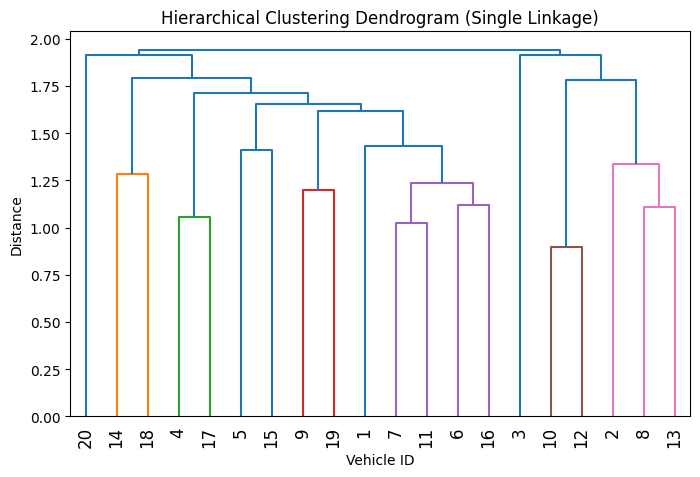


✅ Agglomerative Clustering (complete) Completed
                  Vehicle_ID  Engine_Size  Horsepower    Mileage  \
Cluster_complete                                                   
0                      11.30     1.863510  191.600000  20.700000   
1                       8.00     4.372873  264.833333  23.666667   
2                      12.25     2.935961  345.250000  14.000000   

                         Price  Cluster_single  
Cluster_complete                                
0                 32800.000000        0.000000  
1                 17333.333333        1.166667  
2                 34000.000000        0.000000  


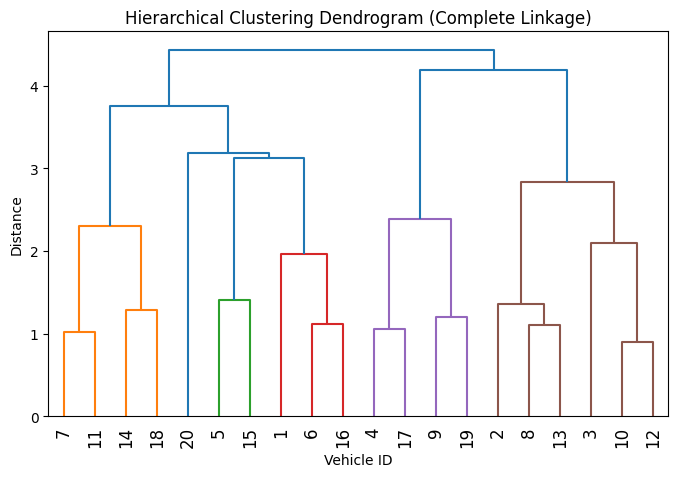


✅ Agglomerative Clustering (average) Completed
                 Vehicle_ID  Engine_Size  Horsepower    Mileage         Price  \
Cluster_average                                                                 
0                 11.090909     2.260241  232.454545  16.000000  35000.000000   
1                  8.000000     4.372873  264.833333  23.666667  17333.333333   
2                 13.333333     1.838764  246.666667  29.000000  26333.333333   

                 Cluster_single  Cluster_complete  
Cluster_average                                    
0                      0.000000          0.727273  
1                      1.166667          1.000000  
2                      0.000000          0.000000  


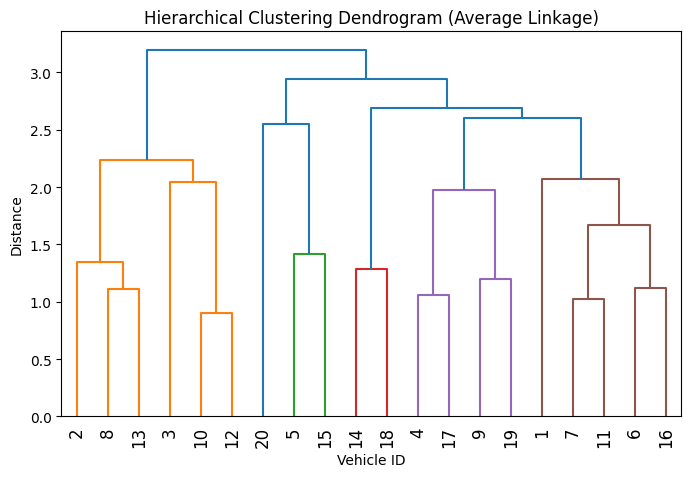


✅ Divisive clustering created 4 groups.


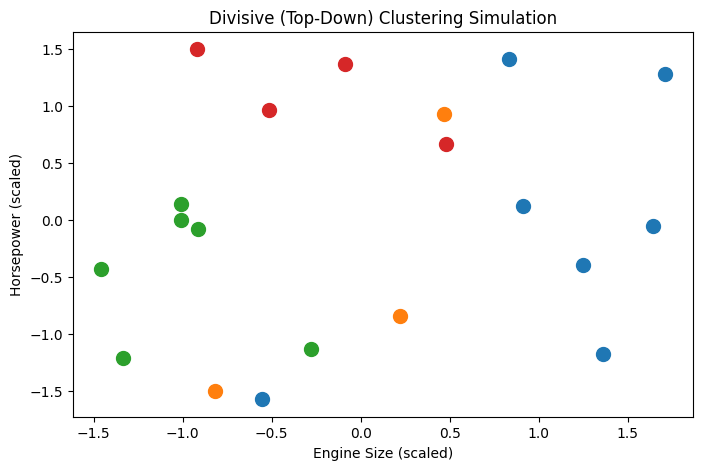

In [2]:
# Hierarchical Clustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load dataset
df = pd.read_csv("vehicle_dataset.csv")
X = df[['Engine_Size', 'Horsepower', 'Mileage', 'Price']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Agglomerative Clustering (Single, Complete, Average) ---
linkages = ['single', 'complete', 'average']

for method in linkages:
    model = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = model.fit_predict(X_scaled)
    df[f'Cluster_{method}'] = labels
    print(f"\n✅ Agglomerative Clustering ({method}) Completed")
    print(df.groupby(f'Cluster_{method}').mean())

    # Dendrogram for each linkage
    plt.figure(figsize=(8, 5))
    Z = linkage(X_scaled, method=method)
    dendrogram(Z, labels=df['Vehicle_ID'].values, leaf_rotation=90)
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Vehicle ID')
    plt.ylabel('Distance')
    plt.show()

# --- Simulated Divisive Clustering ---
# Divisive approach starts with all data in one cluster and splits recursively.
# We'll use recursive k-means to simulate it.

from sklearn.cluster import KMeans

def divisive_clustering(X, k=2, depth=0, max_depth=3):
    if depth == max_depth or len(X) < k:
        return [list(range(len(X)))]
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    clusters = []
    for label in np.unique(labels):
        sub_cluster = X[labels == label]
        indices = np.where(labels == label)[0]
        for c in divisive_clustering(sub_cluster, k, depth + 1, max_depth):
            clusters.append([indices[i] for i in c])
    return clusters

div_clusters = divisive_clustering(X_scaled, k=2, max_depth=2)
print(f"\n✅ Divisive clustering created {len(div_clusters)} groups.")

# Visualize one level of divisive clustering
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], color='gray')
for cluster in div_clusters:
    plt.scatter(X_scaled[cluster, 0], X_scaled[cluster, 1], s=100)
plt.title("Divisive (Top-Down) Clustering Simulation")
plt.xlabel("Engine Size (scaled)")
plt.ylabel("Horsepower (scaled)")
plt.show()
